Before you read this!!! I dont give you any API or key, you have to create your own API key and use it in the code.

Here is my reuirements: 
openai
langchain
python-dotenv
google-search-results
langchain-community 
langchain-core
wikipedia

# ReAct Promting - technical skills


# Task 1 : Research & Literature Review:

## Study the fundamentals of prompt engineering and the ReAct technique.

Giải thích cơ bản về prompt engineering và kỹ thuật ReAct:
+ prompt engineering: kỹ thuật tạo ra các gợi ý hoặc câu hỏi / template cụ thể để hướng dẫn AI trong việc thực hiện các tác vụ cụ thể một cách hiệu quả và chính xác nhất có thể.
+ ReAct: là một kỹ thuật được sử dụng để kết hợp giữa suy luận và hành động, giúp AI thực hiện các tác vụ phức tạp và không liên quan.

Đầu tiên thì các mô hình LLM đang dần tốt hơn trong việc suy luận - reasoning, nhưng chúng vẫn gặp khó khăn trong việc xử lý các yêu cầu phức tạp và không liên quan - action.

ReActs xuất hiện để giải quyết bài toán kết hợp giữa suy luận và hành động. ReAct là một kỹ thuật được thiết kế để giúp các mô hình LLM xử lý các yêu cầu phức tạp và không liên quan bằng cách kết hợp các kỹ thuật như prompt engineering, reinforcement learning, và multi-agent communication systems.

ReActs = Reason + Actions 

ReActs được ứng dụng ở nhiều khía cạnh, ví dụ như: trong việc tạo ra các câu chuyện, trong việc giải quyết các bài toán toán học, trong việc thực hiện các nhiệm vụ phức tạp trong thế giới thực, và trong việc tạo ra các tác phẩm nghệ thuật.

load this image from [https://react-lm.github.io/](https://react-lm.github.io/files/diagram.png) 

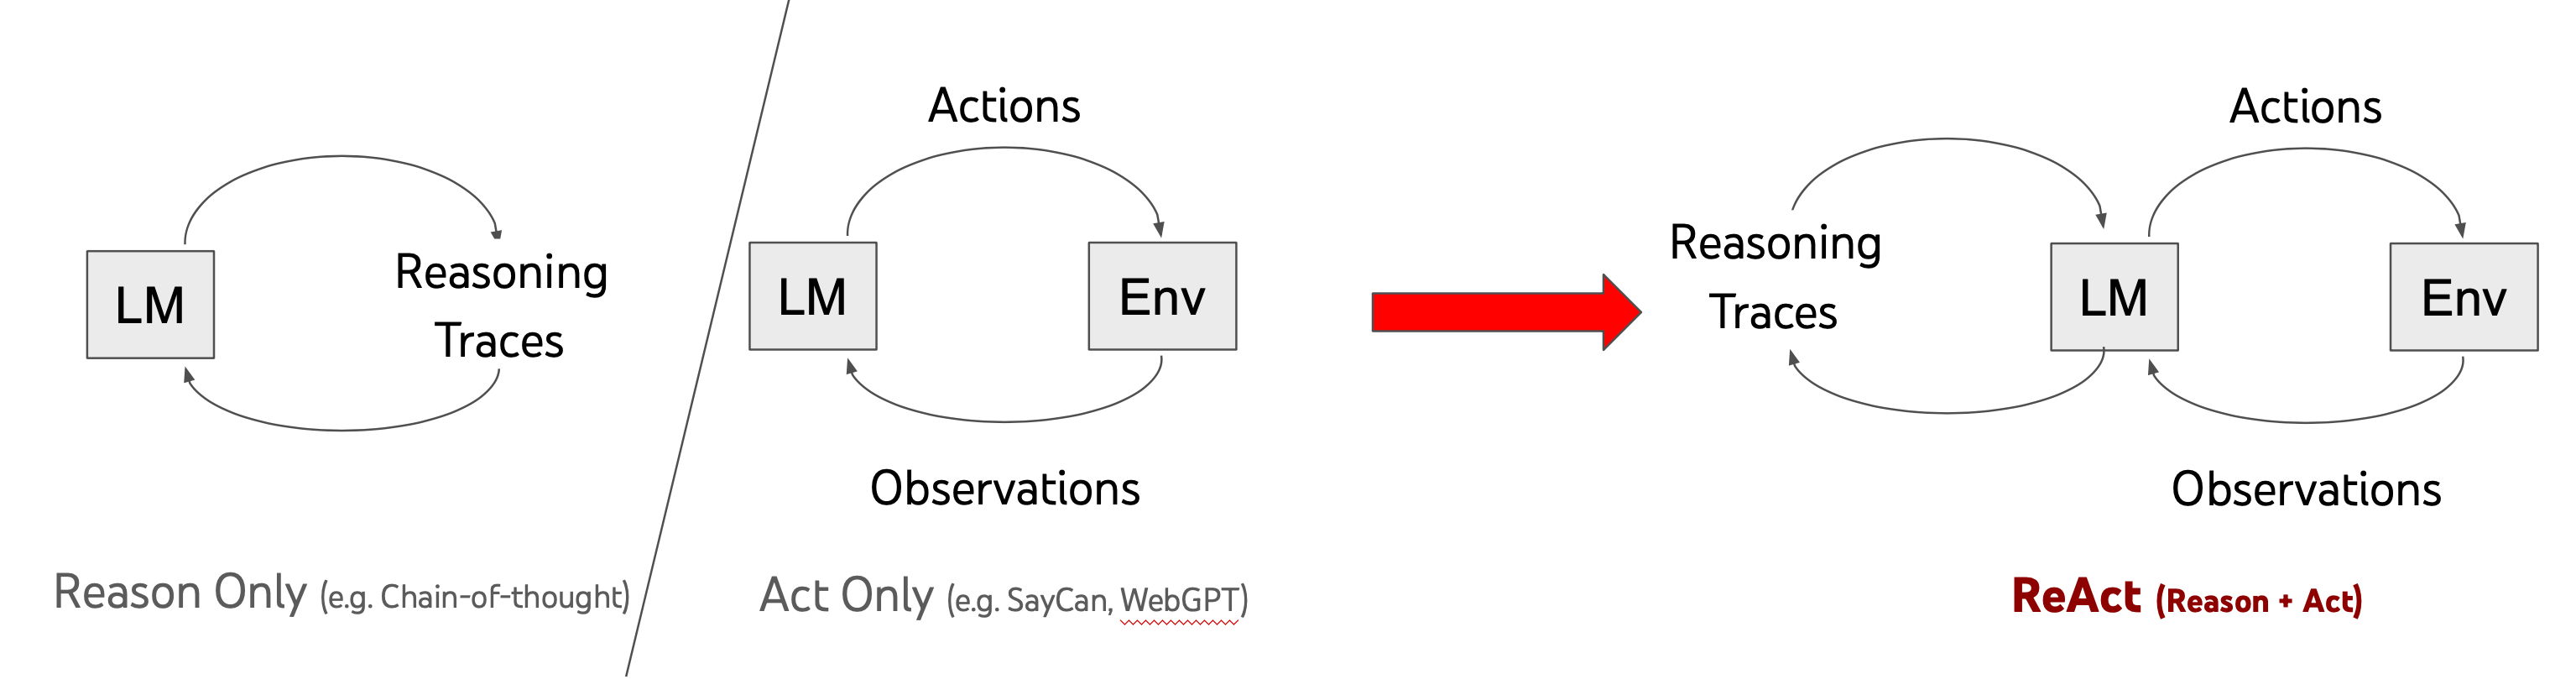

In [6]:
from PIL import Image
image = Image.open(r"Img\structs.png")
display(image)


### Giải thích ReActs:

ReActs tạo ra các reasoning traces, cho phép mô hình suy luận, theo dõi và cập nhật các actions hoặc xử lí các ngoại lệ. Cho phép các actions giao tiếp và thu thập thông tin từ các agents khác, môi trường xung quanh, và các nguồn dữ liệu khác. Các tools thường hay tương tác: gathering informations, retrieval, confirmation, and reasoning <- tăng độ tin cậy cho mô hình.

Nhìn chung, các tác giả nhận thấy cách tiếp cận tốt nhất là sử dụng `ReAct` kết hợp với phương pháp chuỗi suy luận `(Chain-of-Thought - CoT)`, cho phép sử dụng cả `kiến thức nội tại` và `thông tin bên ngoài` thu được trong quá trình lý luận.



#### Ví dụ: HotpotQA

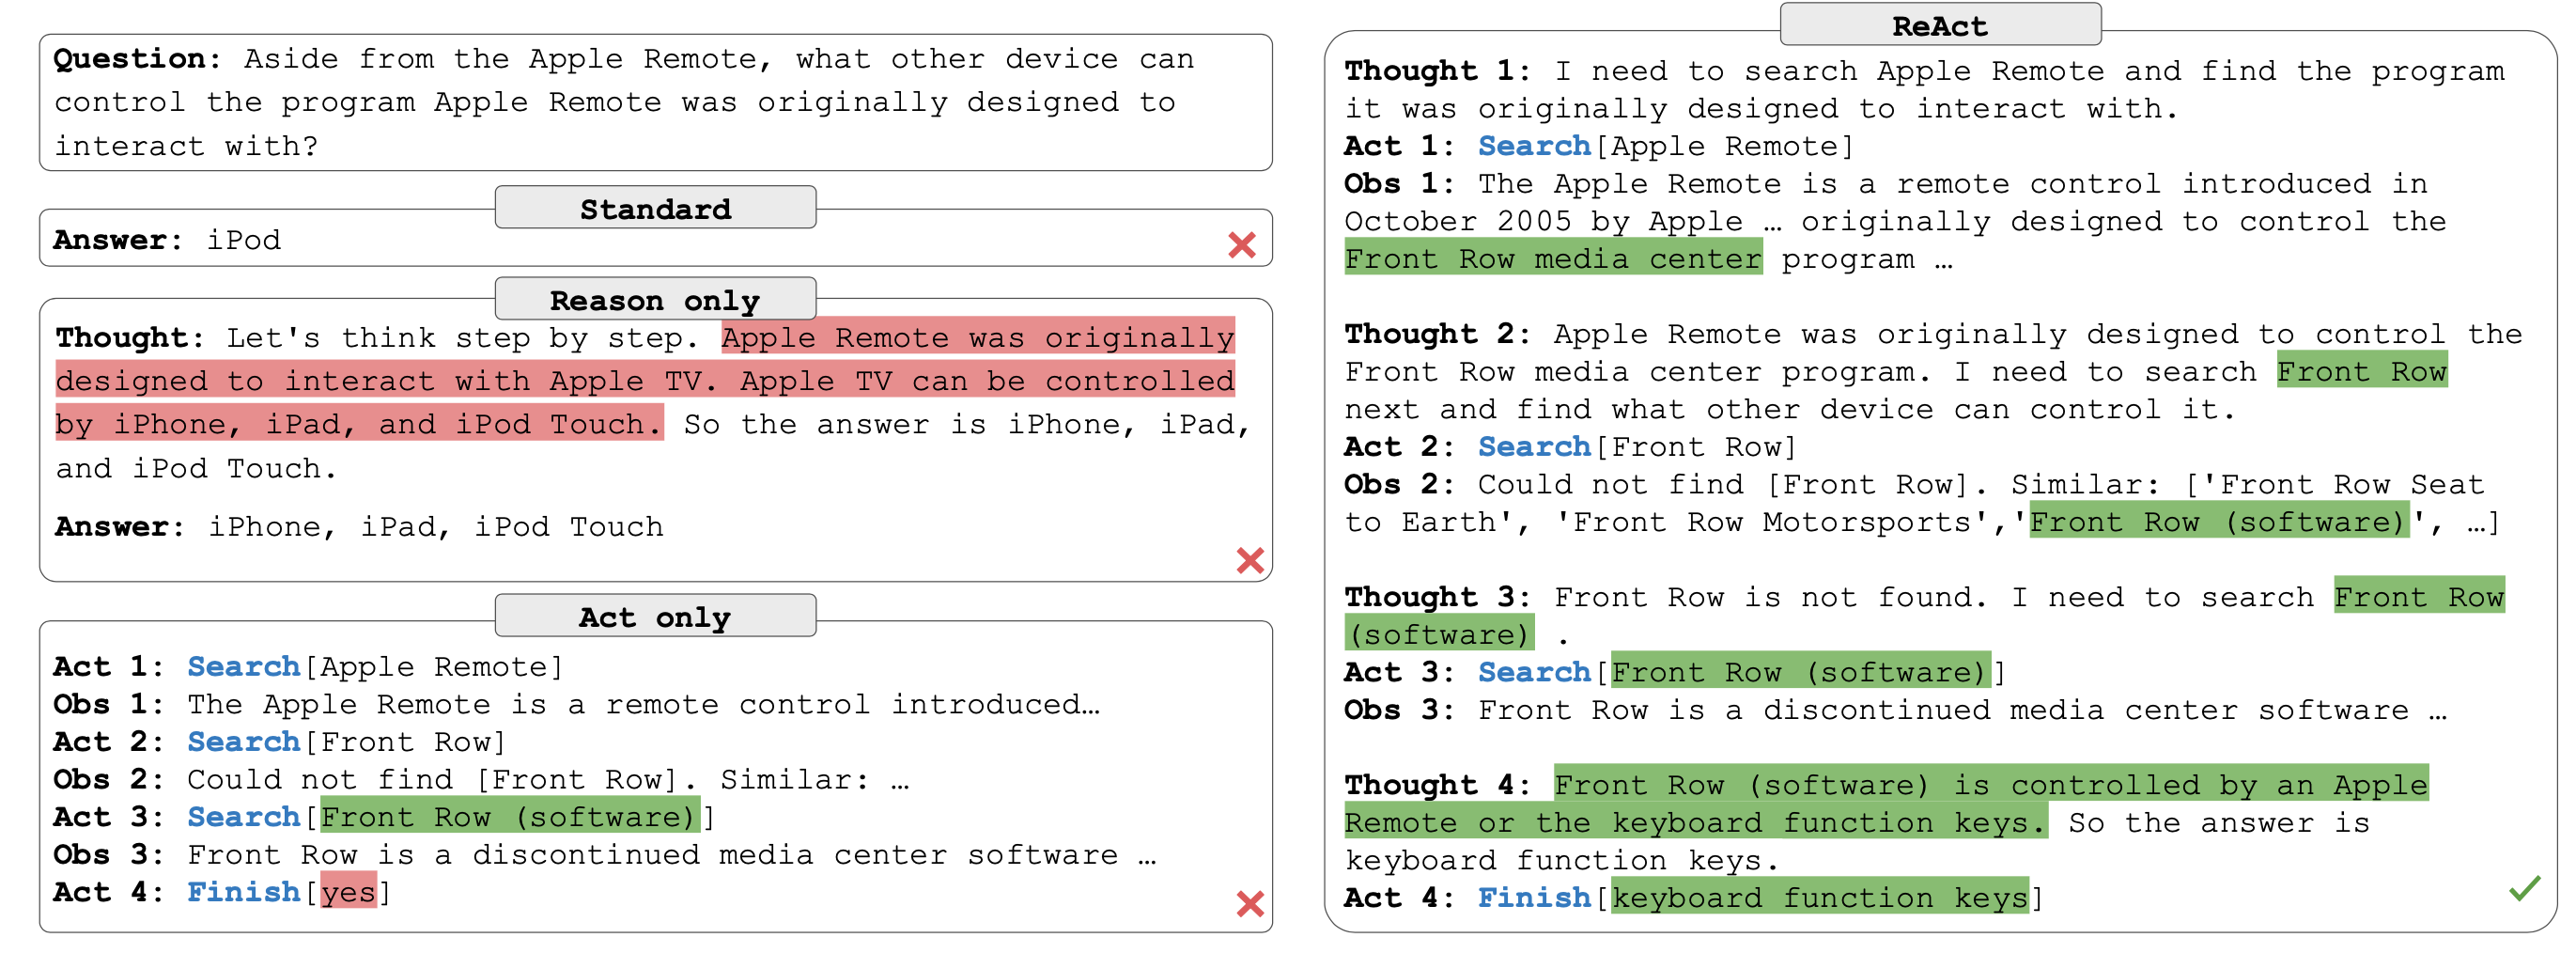

In [7]:
display(Image.open(r"Img\compares.png"))

Hình này giải thích về cách `ReAct` và `CoT` tương tác / được so sánh với nhau - được lấy từ HotpotQA Example [ - paper](https://arxiv.org/abs/2210.03629)

Bên trái màu đỏ là reason-only baseline (i.e. chain-of-thought). Tác giả giải thích rằng câu trả lời bị sai vì thiếu thông tin bên ngoài môi trường và "ảo tưởng" về các thông tin đã biết (fact hallucination and error propagation.). Việc kết hợp với Act only chỉ tìm ra được thông tin cần thiết mà thiếu suy luận - cái màu xanh.

Trong khi đó, ảnh bên phải màu xanh, sử dụng ReActs, giải thích các reasoning traces - màu xanh và sử dụng các thông tin bên ngoài để tăng độ tin cậy của thought. Lặp lại đến khi finish. Như đã thấy, việc tìm thấy traces và sử dụng thông tin bên ngoài đã dẫn đến kết quả chính xác hơn. So với ban đầu - ảnh bên trái - chỉ có thể thu thập mà không tận dụng được thông tin. 

#### Ví dụ: ALFWorld Example - Decision Making Tasks

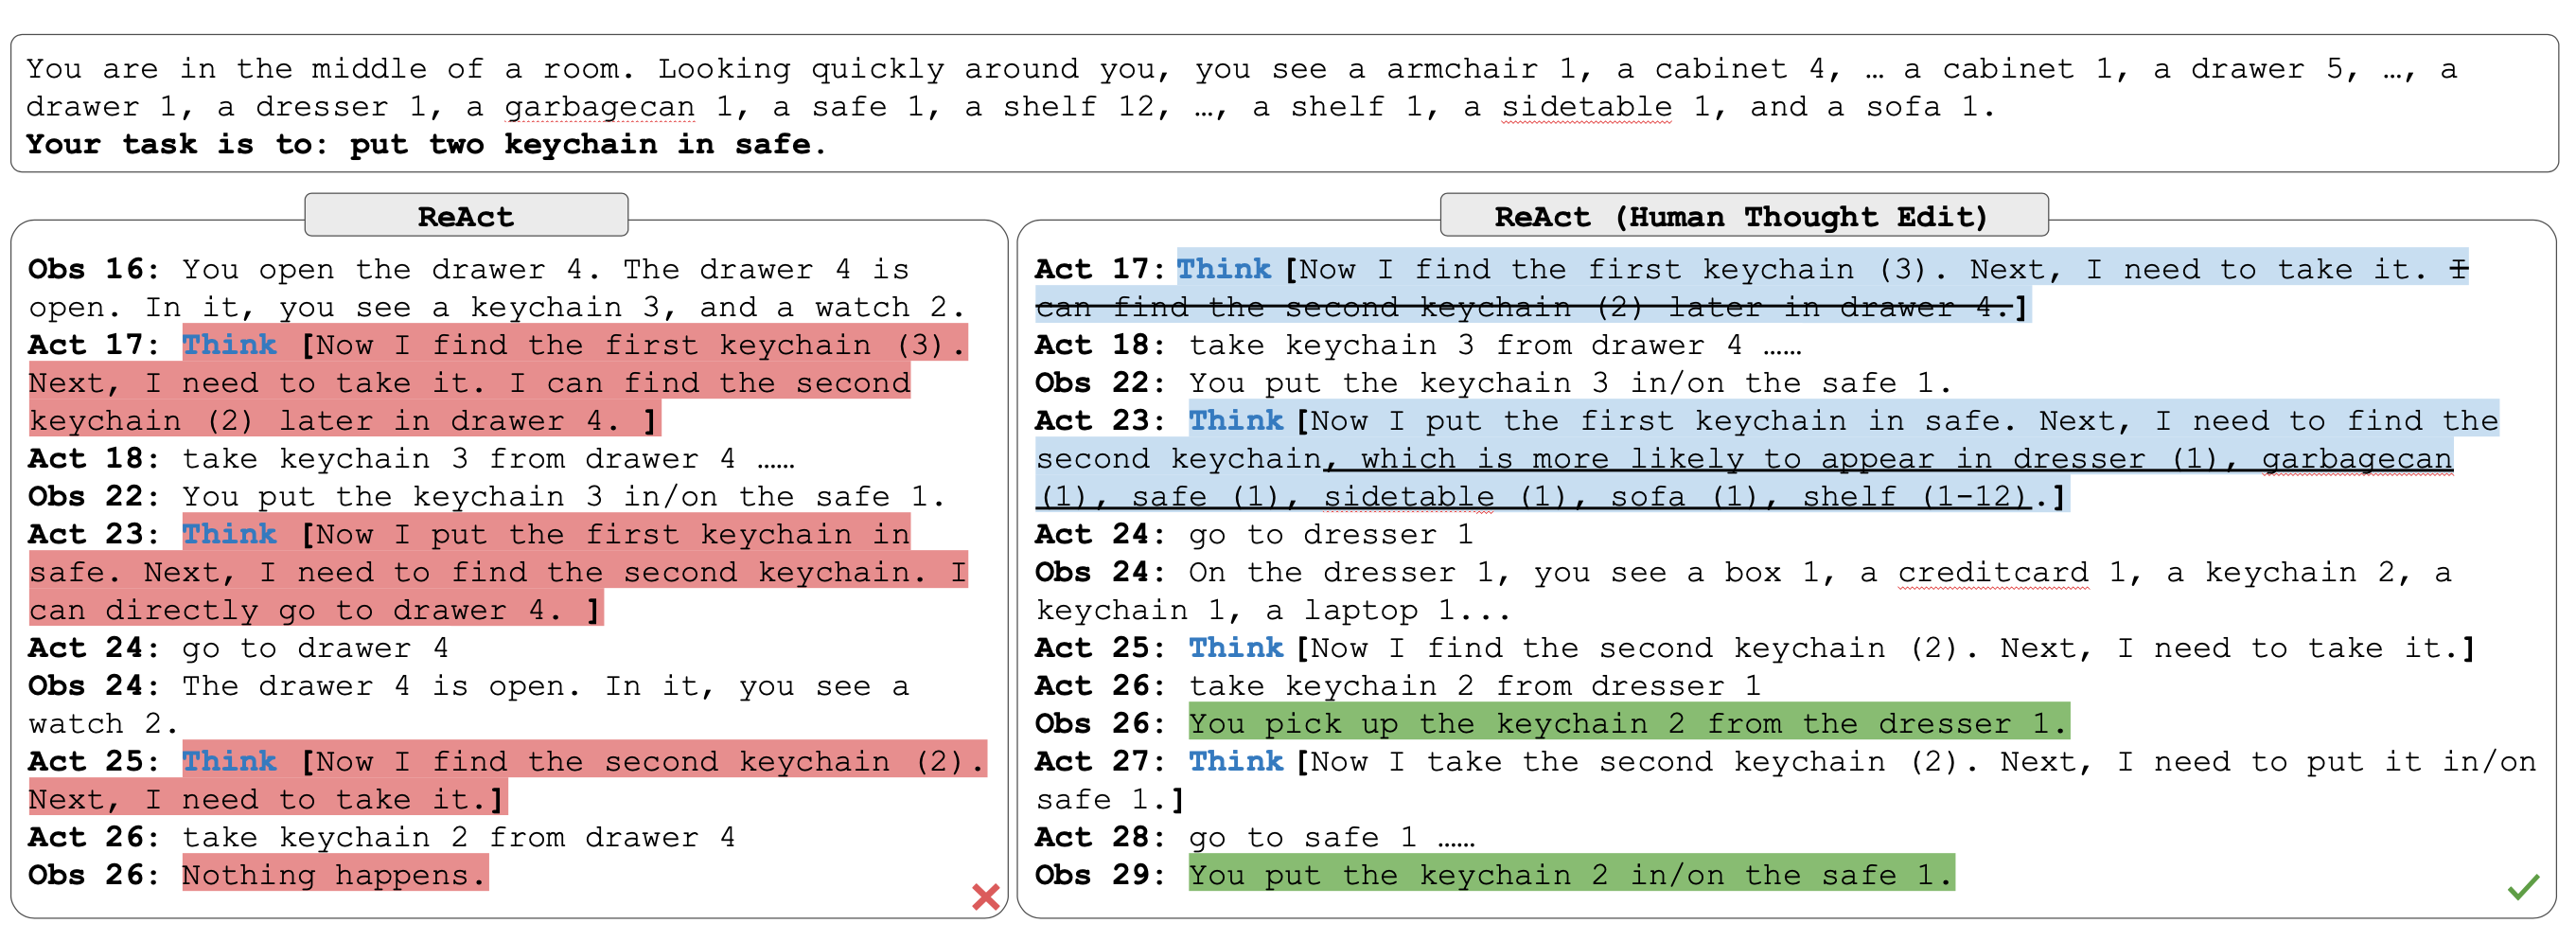

In [8]:
display(Image.open(r"Img\alfworld.png"))

Đây là một trường hợp ReActs fail. 

Yêu cầu: đặt 2 keychain trên safe.

Ảnh bên trái - màu đỏ ReActs - thực hiện think nhiều lần và không hoàn thành actions - obs 22 không phải act 22. Kết quả cuối cùng, dự đoán có sự nhầm lẫn giữa obs và act và hành vi của model. Nhưng ReActs cho phép con người có thể can thiệp và sữa đổi những sai sót 

Tuỳ setup mà ReActs có thể thành công hay thất bại. Đây là 1 example mà ReActs thành công trên bộ ALFWorld.

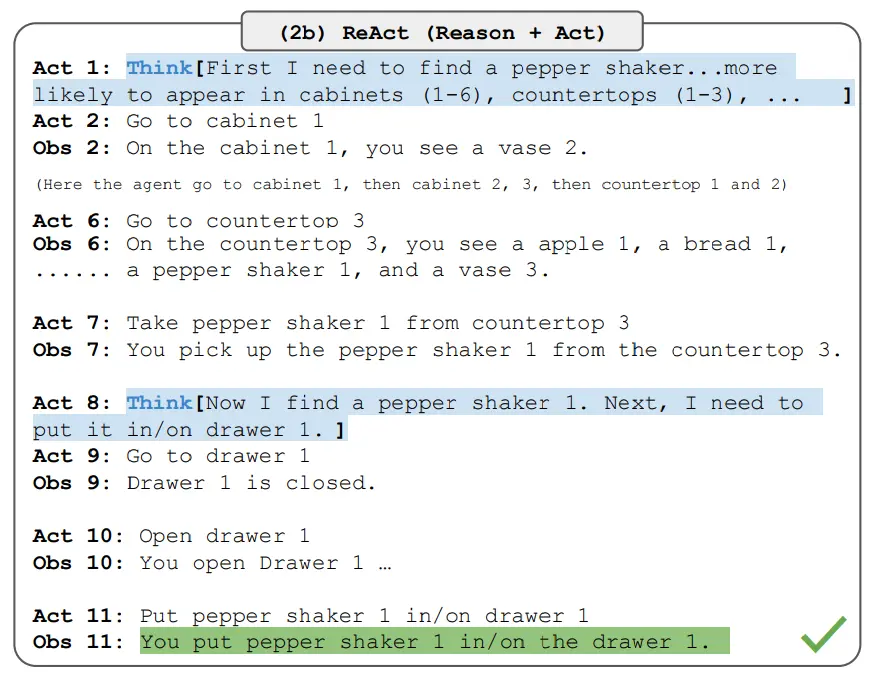

In [11]:
display(Image.open(r"Img\alfworld2.png"))

#### Kết quả:

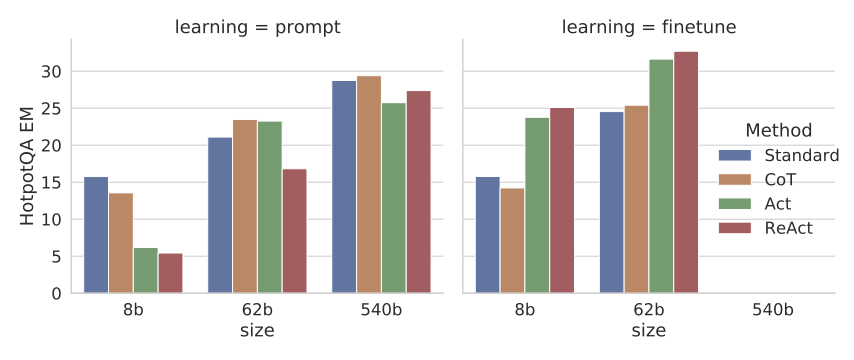

In [9]:
display(Image.open(r"Img\results.png"))

Thang đánh giá Extract match trên HotpotQA - một metric đánh giá trong bài toán HotpotQA, một tập dữ liệu dùng để kiểm tra khả năng đọc hiểu và suy luận đa bước của mô hình ngôn ngữ. Exact Match (EM) đo lường tỷ lệ câu trả lời của mô hình khớp chính xác 100% với đáp án đúng (ground-truth answer). Bao gồm:
+ Không có sai lệch về chính tả, dấu câu, hoặc cách viết.
+ Nếu có khác biệt nhỏ, câu trả lời sẽ bị coi là sai.

Nhận thấy rằng điểm finetune sử dụng ReActs cao hơn so với điểm finetune chỉ sử dụng prompting hoặc các kỹ thuật khác. Tác giả thừa nhận "ReAct is the best fintuning format across model sizes; (2) ReAct finetuned smaller models outperform prompted larger models!" - trường hợp này hiện tại tôi chưa xác thực - so i dont give any argument here.

## Review existing literature and research papers on multi-agent communication systems.

Reference doc for ReActs: 
+ [arxiv: Multi-Agent Communication Systems](https://arxiv.org/abs/2210.03629)
+ [langchain document](https://api.python.langchain.com/en/latest/agents/langchain.agents.react.agent.create_react_agent.html)
+ [viblo: Toi da hoa suc manh cua LLM bang viec su dung react agent](https://viblo.asia/p/toi-da-hoa-suc-manh-cua-llm-bang-viec-su-dung-react-agent-obA46wR9JKv)
+ [llamaindex: React Agent](https://docs.llamaindex.ai/en/stable/examples/agent/react_agent_with_query_engine/)
+ [guide from DAIR.AI](https://www.promptingguide.ai/techniques/react)

Reference doc for Multi-agent communication systems:

khái niệm cơ bản: là các hệ thông đóng vai trò then chốt trong việc cho phép các agents cộng tác, chia sẻ thông tin từ nhiều nguồn khác nhau và các dạng dữ liệu khác nhau và đưa ra quyết định chung để đạt mục tiêu. Nghiên cứu gần đây đã khám phá nhiều khía cạnh khác nhau của các hệ thống này, bao gồm chiến lược giao tiếp (strategies, decision-making processes), quy trình ra quyết định và tích hợp các công nghệ tiên tiến như học tăng cường sâu (DRL) và mô hình ngôn ngữ lớn (LLM).


+ [Communication and Collaborative Decision-Making with DRL](https://arxiv.org/abs/2305.17141): Nghiên cứu của Zeng Da giới thiệu một cơ chế multi-agent communication dựa trên các mô-đun lên lịch (weight scheduling) và Centralized Training Decentralized Execution (CTDE) framework . Cách tiếp cận này cho phép các tác nhân trao đổi thông tin một cách hiệu quả, giảm thiểu sự không cố định trong môi trường đa tác nhân và tăng cường ra quyết định hợp tác. - abstract only
+ [Enhancing Communication with GPT-based Methods](https://dl.acm.org/doi/10.1145/3674399.3674432): Những tiến bộ gần đây đề xuất sử dụng các phương pháp dựa trên GPT để trích xuất thông tin ngữ nghĩa trong giao tiếp đa tác nhân. Cách tiếp cận này tận dụng các LLM để tạo và giải thích các thông điệp, tạo điều kiện cho các tương tác nhiều sắc thái và bối cảnh hơn giữa các tác nhân.- abstract only

+ [Giới thiệu Multi-Agent](https://viblo.asia/p/tai-sao-phai-la-multi-agent-BQyJKGQ9JMe)


## Explore case studies or implementations where irrelevant inputs impact system performance, particularly in ReAct-based systems.

+ Vấn đề : Khi người dùng cung cấp đầu vào không liên quan hoặc mơ hồ (ví dụ: văn bản không cấu trúc, câu đùa), hệ thống cố gắng suy luận dựa trên thông tin này và kích hoạt các công cụ không cần thiết. - MultiAgent system
    - Ảnh hưởng: 
        * Tăng độ trễ do gọi API/công cụ thừa.
        * Tiêu tốn tài nguyên, đặc biệt khi tích hợp với các công cụ tìm kiếm hoặc cơ sở dữ liệu
        * Kết quả trả về không đúng hoặc không có giá trị vì suy luận bị nhiễu.
    - Giải pháp:
        * Sử dụng lọc đầu vào để xác định ý định người dùng và loại bỏ thông tin không liên quan.
        * Áp dụng ngưỡng tự tin để quyết định có nên suy luận và hành động trên đầu vào hay không.

+ Vấn đề: Khi đầu vào không liên quan hoặc mơ hồ, công cụ truy xuất có thể trả về dữ liệu sai lệch hoặc không liên quan. - RAG
    - Ảnh hưởng:
        * Giảm độ chính xác của phản hồi do kết quả suy luận sai lệch.
        * Tăng chi phí tính toán khi truy vấn dữ liệu không cần thiết.
        * Ảnh hưởng đến trải nghiệm người dùng, đặc biệt trong các ứng dụng ra quyết định quan trọng.
    - Giải pháp:
        * Áp dụng tinh chỉnh truy vấn bằng cách sử dụng embedding và tính toán độ tương đồng (cosine similarity), hoặc sử dụng các metrics khác tốt hơn
        * Thêm bộ lọc đầu vào để xác minh truy vấn dựa trên ontology của lĩnh vực.

+ Vấn đề: Đầu vào không liên quan làm lệch quy trình suy luận và dẫn đến hành động không cần thiết hoặc sai lầm. - ReActs + Multi Agent Sys
    - Ảnh hưởng:
        * Gia tăng các bước xử lý không cần thiết.
        * Tiêu hao tài nguyên khi gọi API/công cụ tính phí.
        * Gia tăng tỷ lệ thất bại trong các tác vụ yêu cầu độ chính xác cao.
    - Giải pháp:
        * Thêm cơ chế tự đánh giá trong quá trình suy luận để phát hiện bước xử lý thừa hoặc giới hạn loop.
        * Giới hạn hành động: Đặt ngưỡng giới hạn số lần gọi công cụ/API.

Các vấn đề nêu trên thuộc về vấn đề chung của LLM và các vấn đề của Agents và hệ thống. Đã bỏ qua các yếu tố hệ thống như buffer lost, delay, latency, network, api, policy,  ...

# Task 2 :  Understanding the ReAct Technique:

## Learn how ReAct combines reasoning and acting in a single framework to enable logicaldecision-making. 
- đã process ở trên

## Identify common challenges in multi-agent systems (e.g., irrelevant or noisy input triggering actions).

Vấn đề: 
+ Noisy or Irrelevant Input : Các agents có thể hiểu nhầm dữ liệu noise hoặc đầu vào không liên quan là tín hiệu có ý nghĩa, dẫn đến các hành động không cần thiết hoặc sai lệch. Xuất hiện khi các trường dữ liệu là khác nhau và các bước transform xảy ra lỗi. 

+ Ambiguous Communication Between Agents : Các agents có thể trao đổi thông tin không đầy đủ, mơ hồ hoặc không liên quan, gây gián đoạn ra quyết định. Điều này xảy ra khi việc quản lí các agents thiếu hiệu quả. 

+ Failure to Handle Conflicting Information : Các agents có thể nhận được các tín hiệu mâu thuẫn từ dữ liệu nhiễu, dẫn đến quyết định sai hoặc không thể hành động. Thông tin tiếp theo được cung cấp có thể dẫn đến conflict và các agents không thể quyết định hành động phù hợp.

+ Agent Overreaction to Edge Cases: Các agents có thể phân loại sai các trường hợp ngoại lệ hoặc sự kiện hiếm gặp là tín hiệu quan trọng, dẫn đến các hành động không cần thiết.

+ Cascading Failures: Các agents không thể thích ứng với dữ liệu nhiễu theo thời gian, dẫn đến các hành động kém hiệu quả lặp đi lặp lại tiếp tục gây ra lỗi. Vấn đề này xuất hiện do có giới hạn context limit buffer cho mô hình hay mọi người hay nói là càng học càng ngu thì ở đây là càng giao tiếp thì càng ngu trên 1 conservation.



# Task 3 :  Problem Analysis:

## Analyze a given multi-agent interaction system (or a simulation) where ReAct is implemented.

This given multi-agent interaction system (or a simulation) where ReAct is implemented is taken from [here](https://raga.ai/blogs/react-agent-llm)

In [25]:
import os
from dotenv import load_dotenv

# Load environment variables
load_dotenv()

from langchain.chat_models import ChatOpenAI
from langchain.agents import Tool, initialize_agent, AgentType
from langchain.utilities import WikipediaAPIWrapper
from langchain.agents.react.base import DocstoreExplorer

# Set up API key for OpenAI
os.environ["OPENAI_API_KEY"] = os.getenv("OPENAI_API_KEY")

# Initialize the ChatGPT model
llm = ChatOpenAI(model_name="gpt-4o-mini", temperature=0)

# Set up Wikipedia API wrapper
wikipedia = WikipediaAPIWrapper()
docstore = DocstoreExplorer(wikipedia)

# Define tools
search_tool = Tool(
    name="Search",
    func=wikipedia.run,  # Use the run method for search
    description="Search Wikipedia for general information."
)

lookup_tool = Tool(
    name="Lookup",
    func=wikipedia.run,  # Use the same run method for lookup
    description="Lookup specific details in Wikipedia."
)

tools = [search_tool, lookup_tool]

# Initialize ReAct agent with error handling
research_agent = initialize_agent(
    tools,
    llm,
    agent=AgentType.REACT_DOCSTORE,
    handle_parsing_errors=True,  # Retry if parsing error occurs
    verbose=True
)

# Example Task
question = "Who is the CEO of Tesla?"

# Run the agent
print("Research Agent at work:")
try:
    research_result = research_agent.run(question)
    print("Final Answer:", research_result)
except ValueError as e:
    print("Agent failed to complete the task. Error:", e)


Research Agent at work:


> Entering new AgentExecutor chain...
To find out who the CEO of Tesla is, I will search for the current CEO of Tesla. 

Action: Search[Tesla CEO] 

Observation: Page: Tesla, Inc.
Summary: Tesla, Inc. ( TESS-lə or  TEZ-lə) is an American multinational automotive and clean energy company. Headquartered in Austin, Texas, it designs, manufactures and sells battery electric vehicles (BEVs), stationary battery energy storage devices from home to grid-scale, solar panels and solar shingles, and related products and services.
Tesla was founded in July 2003 by Martin Eberhard and Marc Tarpenning as Tesla Motors. Its name is a tribute to inventor and electrical engineer Nikola Tesla. In February 2004, Elon Musk joined as Tesla's largest shareholder; in 2008, he was named chief executive officer. In 2008, the company began production of its first car model, the Roadster sports car, followed by the Model S sedan in 2012, the Model X SUV in 2015, the Model 3 sedan in 2017

Như đã thấy ở kết quả thì agent đã tìm kiếm và trả lời câu hỏi của chúng ta. Đó là một ví dụ về cách sử dụng ReAct agent để tìm kiếm thông tin trên Wikipedia và trả lời câu hỏi của người dùng.

Agents gồm 2 tools chính là Search và Lookup. Search tool sẽ tìm kiếm thông tin chung trên Wikipedia, trong khi Lookup tool sẽ tra cứu thông tin cụ thể. Agent sẽ sử dụng các tool này để tìm kiếm thông tin và trả lời câu hỏi của người dùng. Nhưng quá trình ReActs không thật sự thể hiện rỏ, hành vi nó chỉ như CoT và các actions, do đó ta sẽ test thêm 1 case nữa. 

In [26]:
from langchain import hub

# Pull ReAct prompt from hub
prompt = hub.pull("hwchase17/react")
prompt

c:\Python311\Lib\site-packages\langsmith\client.py:261: LangSmithMissingAPIKeyWarning: API key must be provided when using hosted LangSmith API
  warnings.warn(


PromptTemplate(input_variables=['agent_scratchpad', 'input', 'tool_names', 'tools'], input_types={}, partial_variables={}, metadata={'lc_hub_owner': 'hwchase17', 'lc_hub_repo': 'react', 'lc_hub_commit_hash': 'd15fe3c426f1c4b3f37c9198853e4a86e20c425ca7f4752ec0c9b0e97ca7ea4d'}, template='Answer the following questions as best you can. You have access to the following tools:\n\n{tools}\n\nUse the following format:\n\nQuestion: the input question you must answer\nThought: you should always think about what to do\nAction: the action to take, should be one of [{tool_names}]\nAction Input: the input to the action\nObservation: the result of the action\n... (this Thought/Action/Action Input/Observation can repeat N times)\nThought: I now know the final answer\nFinal Answer: the final answer to the original input question\n\nBegin!\n\nQuestion: {input}\nThought:{agent_scratchpad}')

In [30]:
template = '''Answer the following questions as best you can. You have access to the following tools:
{tools}
Use the following format:
Question: the input question you must answer
Thought: you should always think about what to do
Action: the action to take, should be one of [{tool_names}]
Action Input: the input to the action
Observation: the result of the action
... (this Thought/Action/Action Input/Observation can repeat N times)
Thought: I now know the final answer
Final Answer: the final answer to the original input question
Begin!
Question: {input}
Thought:{agent_scratchpad}'''

In [39]:
from langchain.agents import AgentExecutor, create_react_agent
from langchain_core.prompts import PromptTemplate

prompt = PromptTemplate.from_template(template)

# Create ReAct agent using the tools and prompt
agent = create_react_agent(llm, tools, prompt)

# Set up the AgentExecutor to execute the agent with the tools
agent_executor = AgentExecutor(agent=agent, tools=tools,
                                verbose=True,
                                return_intermediate_steps=True,)

# Example Task
question = r"Where is the hometown of the 2007 US PGA championship winner and his score?"

# Run the agent using AgentExecutor
print("Agent at work:")
result = agent_executor.invoke({"input": question})

# Print the result
print("Final Answer:", result)

Agent at work:


> Entering new AgentExecutor chain...
I need to find out who won the 2007 US PGA Championship and their score, as well as their hometown. To do this, I will search for information about the 2007 US PGA Championship winner. 

Action: Search  
Action Input: "2007 US PGA Championship winner and score"  Page: List of PGA Championship champions
Summary: The PGA Championship is an annual golf competition formerly held in mid-August until 2019, when it moved to mid-May. It was established in 1916 and is one of the four major championships played each year which include the Masters, the U.S. Open, and the Open Championship (British Open). In addition, this championship is conducted by the Professional Golfers' Association of America (PGA).  Due to World War I and II, the competition was not held from 1917 to 1918 and in 1943, respectively.
The reigning champion of the competition is automatically invited to play in the other three majors for the next five years, and is exempt 

In [46]:
import re

# Regex to extract the tool names in 'AgentAction(tool='X')'
tool_names = re.findall(r"AgentAction\(tool='(\w+)'", str(result))

tool_names

['Search',
 'Lookup',
 'Lookup',
 'Search',
 'Search',
 'Search',
 'Search',
 'Search',
 'Search',
 'Search',
 'Search',
 'Search',
 'Search',
 'Search',
 'Search']

Kết quả đúng và hành vi của Systeam sau khi ReActs rất hiệu quả !!!, chỉ là không đánh giá đc liệu so với CoT có thực sự tốt hơn không. Nhưng khẳng định được system có cả reasoning và Actions

## Identify scenarios where irrelevant or noisy inputs trigger unintended actions. 

For example : `Lack of Proper Entities or Keywords`

- Example: A user types, "Can you help me with this?"
- Problem: Without specific keywords or entities, the system may trigger an action that’s too general or unrelated, such as a search query for help-related topics or an unhelpful assistant prompt.

In [47]:
# Example Task
question = r"Can you help me with this?"

# Run the agent using AgentExecutor
print("Agent at work:")
result = agent_executor.invoke({"input": question})

# Print the result
print("Final Answer:", result)

Agent at work:


> Entering new AgentExecutor chain...
I need to understand what specific help is being requested. Since the question is vague, I should search for general information on how I can assist. 
Action: Search
Action Input: "how can I help you" Page: How Can I Help You Say Goodbye
Summary: "How Can I Help You Say Goodbye" is a song written by Karen Taylor-Good and Burton Banks Collins. It was first recorded by American country music singer Patty Loveless for her 1993 album, Only What I Feel and released in March 1994 as the fourth single. A version by American singer, songwriter, and actress Laura Branigan was released later the same year on her final studio album, Over My Heart, also being released as a single. The song was later included on Branigan's 1995 greatest hits album, The Best of Branigan.
The Song is also recorded by Melanie Safka in some different versions. It was first released on the Double CD "Silvery Anniversary" in 1993 and on some compilation CD's in 1999.

Yup, và sau đó thì nó bắt đầu loop ngu đến 25s thì dừng. 

- Question là:  Can you help me with this?
- Ans là: To help someone in need, you can listen actively, ask how you can help, offer practical assistance, be present, provide resources, and follow up on their situation.

Khá là không liên quan. Đây là một trong những case study đã nêu bên trên gây ảnh hưởng hệ thống. Tuy nhiên vẫn sẽ có cách khắc phục.

## Define the boundaries of “relevant” and “irrelevant” messages in the system.

Trong trường hợp này, giới hạn của relevant có thể liên quan đến search tools - ở đây là toàn bộ kiến thức mà API của wikipedia có thể cung cấp. Còn irrelevant là những thông tin không liên quan đến kiến thức của wikipedia. Tuy vậy có thể suy nghĩ thêm về các hành vi nằm ngoài prompting + tools nhưng vẫn thuộc domain của model LLM - trường hợp tấn công này gọi là injection attack.|

## Task 4 : Prompt Design:

### Design and test optimized prompts for agents to improve their ability to:
+ Differentiate between relevant and irrelevant messages.
+ Maintain contextual understanding when reasoning.
+ Prevent logical functions from being triggered by spurious inputs.

Ở đây chỉ test đơn giản để đạt được mục đích. Thực tế ngoài prompt còn phải tinh chỉnh nhiều yếu tố khác của model và hệ thống - phần này không bàn luận.

Idea ở đây là apply các filter và cho template thêm 1 vài instructions để agent có thể nhận ra và xử lý các input không liên quan.

In [48]:
template = '''Answer the following questions as best you can. You have access to the following tools:
{tools}

### Instructions:
1. **Relevance Filtering**: Identify if the question or input is relevant to the system's capabilities. If it is irrelevant (e.g., off-topic, vague, or unanswerable), do not trigger any tool or perform any action.
2. **Contextual Awareness**: Consider the full context of the conversation. Ensure that responses align with prior user queries or actions. If necessary, ask for clarification to maintain clarity and relevance.
3. **Prevent Logical Missteps**: Avoid triggering actions that do not directly relate to the question or objective. If the input is unclear or doesn't lead to a meaningful action, seek clarification or ignore irrelevant inputs.
4. **Response Structure**: Follow this structure for each input, including a process of thinking, identifying tools, and making an informed decision.

Use the following format:
Question: the input question you must answer
Thought: you should always think about what to do. Consider relevance, context, and the system's capabilities.
Action: the action to take, should be one of [{tool_names}]. Only trigger an action if the message is relevant and actionable.
Action Input: the input to the action. This should be derived based on relevance and context.
Observation: the result of the action. Review the result and check if the next steps are needed.
... (this Thought/Action/Action Input/Observation can repeat N times as necessary)
Thought: I now know the final answer. If no relevant action was taken, stop.
Final Answer: the final answer to the original input question. If the message was irrelevant, and stop.

Begin!
Question: {input}
Thought:{agent_scratchpad}'''


In [49]:
# Example Task
prompt = PromptTemplate.from_template(template)

# Create ReAct agent using the tools and prompt
agent = create_react_agent(llm, tools, prompt)

# Set up the AgentExecutor to execute the agent with the tools
agent_executor = AgentExecutor(agent=agent, tools=tools,
                                verbose=True,
                                return_intermediate_steps=True,)
                                
question = r"Can you help me with this?"

# Run the agent using AgentExecutor
print("Agent at work:")
result = agent_executor.invoke({"input": question})

# Print the result
print("Final Answer:", result)

Agent at work:


> Entering new AgentExecutor chain...
The question is vague and does not provide specific information about what assistance is needed. It does not align with the system's capabilities as it lacks context. 
Action: None
Final Answer: The question is too vague to provide assistance. Please provide more details about what you need help with.

> Finished chain.
Final Answer: {'input': 'Can you help me with this?', 'output': 'The question is too vague to provide assistance. Please provide more details about what you need help with.', 'intermediate_steps': []}


Yup, as you can see. Maybe this seems like great, right?